In [3]:
# Importing all required libraries.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# import the data 
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [66]:
# Finding  the shape
df.shape

(8807, 12)

In [67]:
# Finding the null values 
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Task1. Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [68]:
df[df.duplicated()]
#There is no duplicate values found.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Task. 2) Is there any Null Value present in any column ? Show with Heat-map.

In [69]:
# Finding Null Values
df1 =  df.isnull()

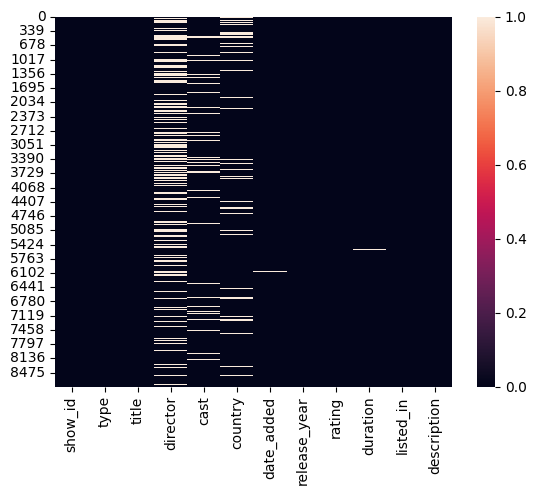

In [70]:
#Showing Heat Map of Null Values 
sns.heatmap(data = df1)
plt.show()

Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [71]:
df[df.title == 'House of Cards']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


If the director's name for a particular show is missing in the Netflix dataset, I may use Google to search for the name of the director,
and I found some names that could correspond to the director of the show.
Robin Wright

Gerald McRaney

David Fincher

Linda Atkinson

John David Coles

Jakob Verbruggen

Q. 2) In which year the highest number of TV Shows & Movies were released? Show with
Bar Graph.

In [72]:
# Total movies released
s = df[(df['type'] == 'Movie' )].release_year.value_counts()

In [73]:
# Seperating the index and value
s1 = s.index.to_list()
s2 = s.to_list()

In [74]:
#counting total value of movie and Tv Show
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

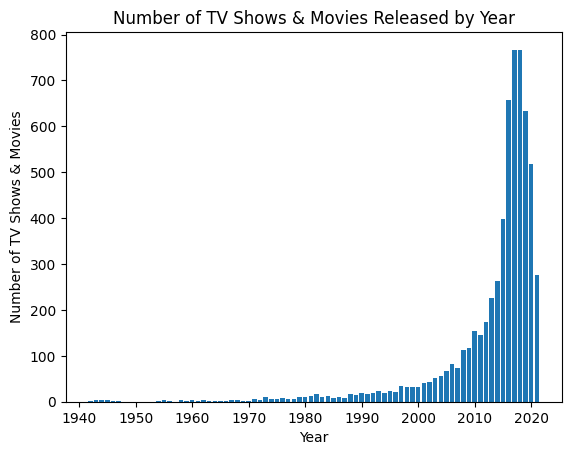

In [75]:
# Bar plot to show this using matplotlib
plt.bar(s1,s2)
plt.xlabel("Year")
plt.ylabel("Number of TV Shows & Movies")
plt.title("Number of TV Shows & Movies Released by Year")
plt.show()

Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph

In [76]:
#counting total value of movie and Tv Show
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

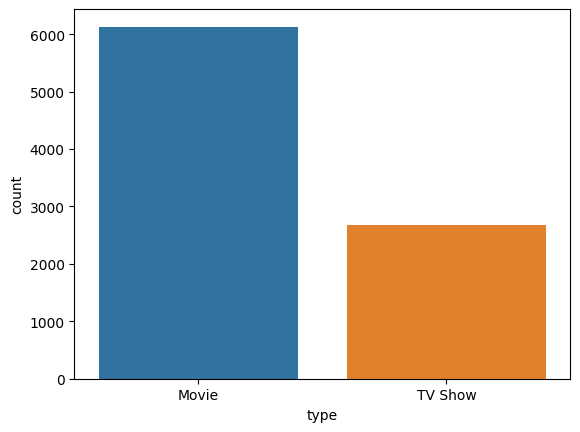

In [77]:
#showing countplot to count the total number of TV shows and movies.
sns.countplot(data = df,x = 'type')

 Q. 4) Show all the Movies that were released in the year 2000.

In [78]:
# counting how many movies were released in year 2000
df[df['release_year'] == 2000].type.value_counts()

type
Movie      33
TV Show     4
Name: count, dtype: int64

• Q. 5) Show only the Titles of all TV Shows that were released in India only.

In [79]:
# Counting all TV Shows that were released in India only.
df[(df['country']== 'India') & (df['type']=='TV Show')].type.count()

79

There are 79 TV Shows were release in india only

In [80]:
#show all the movies and tv shows titles released in india
df[(df['country']== 'India') & (df['type']=='TV Show')].title.head(10)

4                        Kota Factory
39                       Chhota Bheem
50                      Dharmakshetra
66      Raja Rasoi Aur Anya Kahaniyan
69     Stories by Rabindranath Tagore
266              The Creative Indians
297                          Navarasa
876                      Alma Matters
911                  Sab Jholmaal Hai
918                    Lava Ka Dhaava
Name: title, dtype: object

Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to
Netflix ?

In [81]:
# showing Top 10 directors who gave most number of tv shows and movies
df['director'].value_counts().head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or
"Country is United Kingdom".


In [82]:
df[(df.type == 'Movie') & (df.listed_in == 'Comedies') | (df.country == 'United Kingdom') ].value_counts().sum()


275

There are total of 275 movies 

In [83]:
# Showing only 20 records
df[(df.type == 'Movie') & (df.listed_in == 'Comedies') | (df.country == 'United Kingdom') ].head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
32,s33,TV Show,Sex Education,NaN,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ..."
72,s73,TV Show,Jack Whitehall: Travels with My Father,NaN,"Jack Whitehall, Michael Whitehall",United Kingdom,"September 14, 2021",2021,TV-MA,5 Seasons,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...
98,s99,TV Show,Octonauts: Above & Beyond,NaN,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,"British TV Shows, Kids' TV",The Octonauts expand their exploration beyond ...
152,s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,"September 1, 2021",2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...
182,s183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant,...",United States,"September 1, 2021",2008,PG-13,114 min,Comedies,R.J. travels to Georgia for his parents' 50th ...
233,s234,Movie,Count Me In,Mark Lo,NaN,United Kingdom,"August 24, 2021",2021,TV-MA,82 min,"Documentaries, Music & Musicals",This documentary features some of rock's great...
292,s293,Movie,Quartet,Dustin Hoffman,"Maggie Smith, Tom Courtenay, Billy Connolly, P...",United Kingdom,"August 8, 2021",2012,PG-13,98 min,"Comedies, Dramas, Independent Movies","To save their posh retirement home, former ope..."


Q. 8) In how many movies/shows, Tom Cruise was cast ?


In [84]:
df2 = df.copy()

In [85]:
df2.dropna(inplace = True)

In [86]:
df2['New_Cast'] = df2['cast'].apply(lambda a : str(a.split(",")) if a else np.nan)

In [87]:
df2['New_Cast'] = df2['New_Cast'].apply(lambda a : 'Tom Cruise' if 'Tom Cruise' in  a else a )

In [88]:
# Showing the movies
df2[df2['New_Cast'] == 'Tom Cruise']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,New_Cast
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio...",Tom Cruise
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki...",Tom Cruise


Q. 9) What are the different Ratings defined by Netflix ?

▪ Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?

▪ Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?

In [89]:
# Q9.1 .Finding Tv- 14 rating 
df[(df.type == 'Movie') & (df.rating== 'TV-14')&(df.country=='Canada')].value_counts().sum()

10

In [90]:
# Q9.1 .Finding Tv- 14 rating 
df[(df.type == 'Movie')& (df.rating== 'TV-14')&(df.country=='Canada')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
157,s158,Movie,Level 16,Danishka Esterhazy,"Katie Douglas, Celina Martin, Peter Outerbridg...",Canada,"September 1, 2021",2018,TV-14,102 min,"Sci-Fi & Fantasy, Thrillers",In a bleak academy that teaches girls the virt...
1279,s1280,Movie,Made You Look: A True Story About Fake Art,Barry Avrich,NaN,Canada,"February 23, 2021",2020,TV-14,90 min,"Documentaries, International Movies",A woman walks into a New York gallery with a c...
2769,s2770,Movie,There's Something in the Water,"Ellen Page, Ian Daniel",Ellen Page,Canada,"March 27, 2020",2019,TV-14,72 min,"Documentaries, International Movies",This documentary spotlights the struggle of mi...
3424,s3425,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,"October 14, 2019",2019,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...
5972,s5973,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...
5973,s5974,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",2018,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...
6192,s6193,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,"December 27, 2018",2018,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...
6537,s6538,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,"July 1, 2018",2018,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...
7334,s7335,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,"November 12, 2017",2017,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...
7916,s7917,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,"August 22, 2017",2016,TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...


In [91]:
# Q 9.2
df[(df.type == 'TV Show')& (df.release_year > 2018) & (df.rating == 'R')].value_counts().sum()

0

• Q. 10) What is the maximum duration of a Movie/Show on Netflix ?

In [92]:
# Finding all the unique values
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [108]:
# seperating min and seasons text with numeric values
dr = df['duration'].str.split(" ",n = 2,expand = True)

In [95]:
# Rename the column 0 to time and drop all the null values
dr.rename(columns = {0: 'time'},inplace = True)
dr.dropna(inplace = True)

In [96]:
# convert all the values into int
dr['time'] = dr['time'].apply(lambda a : int(a))

In [102]:
# Now cancat the result into ther main data
df = pd.concat([df,dr['time']],axis = 1)

In [109]:
# Showing the sorted result by time column
df.sort_values(by = 'time',ascending = False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,time
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312.0
717,s718,Movie,Headspace: Unwind Your Mind,NaN,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",NaN,"June 15, 2021",2021,TV-G,273 min,Documentaries,"Do you want to relax, meditate or sleep deeply...",273.0
2491,s2492,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,TV-14,253 min,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,253.0
2487,s2488,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979,TV-14,237 min,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,237.0
2484,s2485,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",NaN,"May 21, 2020",1982,TV-PG,233 min,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,s3446,TV Show,My Country: The New Age,NaN,"Yang Se-Jong, Woo Do‑hwan, Seolhyun, Jang Hyuk...",South Korea,"October 5, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, TV Ac...","At the end of the Goryeo period, there were th...",1.0
1146,s1147,TV Show,Haunted: Latin America,Adrián García Bogliano,NaN,"United States, Mexico","March 31, 2021",2021,TV-14,1 Season,"International TV Shows, Reality TV, Spanish-La...",Real people's terrifying tales of the chilling...,1.0
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",NaN
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,NaN


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,time
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0


• Q. 11) Which individual country has the Highest No. of TV Shows ?

In [34]:
# Q . 11
df[df['type'] == 'TV Show'].country.value_counts()

Q. 12) How can we sort the dataset by Year ?

In [35]:
# sorting dataset by YEAR 
df.sort_values(by = 'release_year').head()

Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category
is 'TV Show' & Type is 'Kids' TV'.** Task. 1) Is there any Duplicate Record in this dataset
? If yes, then remove the duplicate records."Country is United Kingdom".

In [36]:
df.drop_duplicates()

In [37]:

df[((df.type == 'Movie') & (df.listed_in == 'Dramas')) | ((df.type == 'TV Shows') & (df.listed_in == 'Kids'))].value_counts().sum()

In [38]:
df[((df.type == 'Movie') & (df.listed_in == 'Dramas')) | ((df.type == 'TV Shows') & (df.listed_in == 'Kids'))].dropna()